# Aufgabe 1 (Time Series & ARIMA)

### 1 Time Series 
Laden Sie die Datei sp500_stocks.csv mit pandas. Untersuchen Sie die ersten Zeilen und Spalten, um sich mit der Struktur der Daten (Datum, Aktienkurse usw.) vertraut zu machen.

In [1]:
import pandas as pd

# Load data
sp500_stocks = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')

# Your code here

### 2 Time Series Grundlagen
Konvertieren Sie die Spalte 'Date' in das datetime-Format und setzen Sie sie als Index des DataFrame. Plotten Sie den Schlusskurs einer ausgewählten Aktie über die Zeit.

In [ ]:
# Your code here

### 3 Umgang mit fehlenden Werten
Überprüfen Sie auf fehlende Werte im Datensatz und behandeln Sie diese (Vorwärtsfüllen, Rückwärtsfüllen oder Interpolation).

In [ ]:
# Your code here

### 4 Resampling von Time Series
Resampeln Sie die Aktienkure auf eine andere "Frequenz" (z.B. monatliche oder vierteljährliche Durchschnitte).

In [ ]:
# Your code here

### 5 Rolling Windows
Berechnen und plotten Sie den rollenden Durchschnitt und die rollende Standardabweichung des Aktienkurses über ein 30-Tage-Fenster.

In [ ]:
# Your code here

### 6 Stationarity & Differencing
Erklären Sie Stationarity in Time Series. Verwenden Sie den Augmented Dickey-Fuller-Test, um zu überprüfen, ob eine Reihe stationär ist. Führen Sie eine Differencing durch, um eine Reihe stationär zu machen.

In [ ]:
# Your code here

### 7 ACF & PACF (Autocorrelation & Partial Autocorrelation)
Generieren Sie Autokorrelationsfunktion (ACF) und partielle Autokorrelationsfunktion (PACF) Diagramme für die Time Series einer Aktie, um potenzielle ARIMA-Parameter zu identifizieren.

In [ ]:
# Your code here

### 8 Einfaches ARIMA-Modell
Erstellen Sie ein einfaches ARIMA-Modell für die Zeitreihe einer einzelnen Aktie. Erklären Sie die Wahl der Parameter (p, d, q) basierend auf den ACF- und PACF-Diagrammen.

In [ ]:
# Your code here

### 9 Modell-Diagnose
Bewerten Sie das ARIMA-Modell anhand von Diagnosediagrammen und berechnen Sie Metriken wie AIC, BIC, um die Modellanpassung zu bewerten.

In [ ]:
# Your code here

### 10 Auto ARIMA
Nutzen Sie "auto_arima" aus dem "pmdarima" Package um die ARIMA Parameter(p,d,q) automatisch via AIC (Aikake Information Criterion) zu finden.  
Vergleichen Sie die gefundenen p,d,q Parater mit den Analysen der ACF/PACF.

In [ ]:
# Your code here

### 11 Prognose mit ARIMA
Verwenden Sie das ARIMA-Modell, um Prognosen zu erstellen. Vergleichen Sie die prognostizierten Werte mit den tatsächlichen Daten mithilfe der Visualisierung.

In [ ]:
# Your code here

# Lösungen

In [2]:
import pandas as pd

# Load data and set 'Date' as index column of the Dataframe (needed by Python to interpret the dates correctly)
sp500_stocks = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv', index_col='Date',parse_dates=True)

# Display the first few rows to understand the data structure
print(sp500_stocks.head())

           Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2010-01-04    MMM  59.318886  83.019997  83.449997  82.669998  83.089996   
2010-01-05    MMM  58.947342  82.500000  83.230003  81.699997  82.800003   
2010-01-06    MMM  59.783295  83.669998  84.599998  83.510002  83.879997   
2010-01-07    MMM  59.826176  83.730003  83.760002  82.120003  83.320000   
2010-01-08    MMM  60.247749  84.320000  84.320000  83.300003  83.690002   

               Volume  
Date                   
2010-01-04  3043700.0  
2010-01-05  2847000.0  
2010-01-06  5268500.0  
2010-01-07  4470100.0  
2010-01-08  3405800.0  


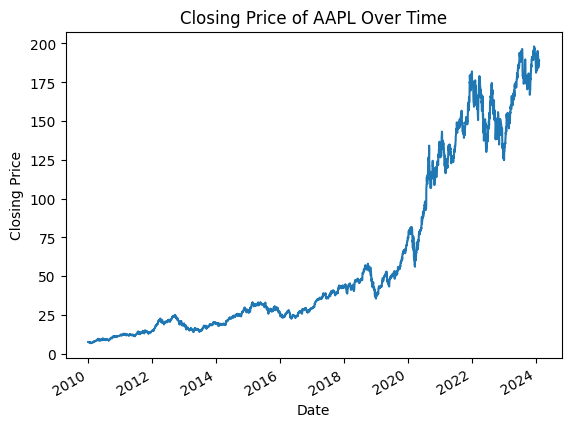

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with 'Date' parsed as datetime and set as index
sp500_stocks = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv', parse_dates=True, index_col='Date')

# Plot the closing price for the stock 'AAPL'
sp500_stocks[sp500_stocks['Symbol'] == 'AAPL']['Close'].plot(title='Closing Price of AAPL Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [4]:
# Check for missing values
print(sp500_stocks.isnull().sum())

# Forward fill missing values as one of the strategies
sp500_stocks_filled = sp500_stocks.ffill()

Symbol           0
Adj Close    26680
Close        26680
High         26680
Low          26680
Open         26680
Volume       26680
dtype: int64


In [5]:
# Inspect the dataframe
sp500_stocks

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...
2024-02-05,FE,36.220001,36.220001,36.660000,36.150002,36.410000,3883600.0
2024-02-06,FE,35.810001,35.810001,35.990002,35.630001,35.750000,2636100.0
2024-02-07,FE,35.830002,35.830002,36.040001,35.650002,35.950001,2514300.0


In [116]:
# Filter the DataFrame for 'AAPL' and select only the 'Close' column
aapl_close = sp500_stocks[sp500_stocks['Symbol'] == 'AAPL']['Close']

# Resample to get monthly averages for 'AAPL' and calculate the mean of 'Close' prices
aapl_monthly_averages = aapl_close.resample('M').mean()

# Cut the series, becomes more handy. In reality this is quite a "hard" discussion
# Take last 10 years
#aapl_monthly_averages = aapl_monthly_averages[-120:]

print(aapl_monthly_averages)

# Check the type of 'monthly_averages'. What is different?

Date
2010-01-31      7.418402
2010-02-28      7.099850
2010-03-31      7.978960
2010-04-30      8.969592
2010-05-31      8.980768
                 ...    
2023-10-31    174.668638
2023-11-30    185.879523
2023-12-31    194.308501
2024-01-31    187.724284
2024-02-29    188.038574
Freq: M, Name: Close, Length: 170, dtype: float64


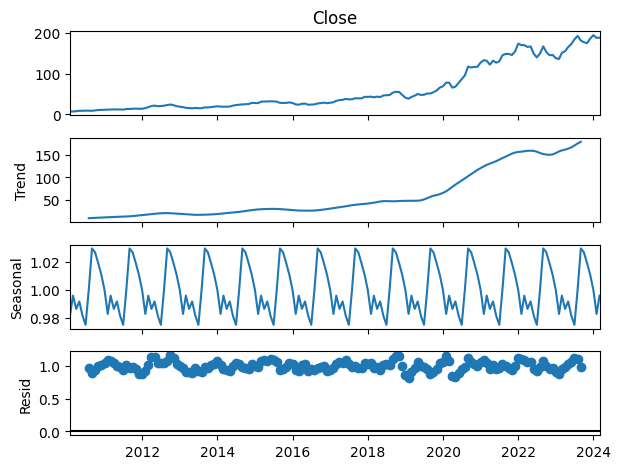

In [117]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(aapl_monthly_averages, model='multiplicative')
result.plot()
pyplot.show()

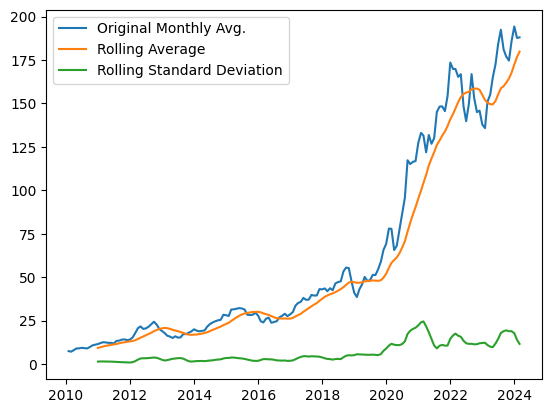

In [118]:
# Calculate rolling average and standard deviation (per year)
rolling_avg = aapl_monthly_averages.rolling(window=12).mean()
rolling_std = aapl_monthly_averages.rolling(window=12).std()

# Plot original prices along with rolling average and standard deviation
plt.plot(aapl_monthly_averages, label='Original Monthly Avg.')
plt.plot(rolling_avg.index, rolling_avg, label='Rolling Average')
plt.plot(rolling_std.index, rolling_std, label='Rolling Standard Deviation')
plt.legend()
plt.show()

In [119]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check stationarity for the monthly averages
result = adfuller(aapl_monthly_averages.dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

print(f'\n\nAfter Differencing:')   
# If the p-value is greater than 0.05, we cannot reject the null hypothesis (the series is not stationary)
# Perform differencing to make the series stationary (default periods=1, i.e. t-1)
aapl_monthly_averages_diff = aapl_monthly_averages.diff(periods=1).dropna()

result_diff = adfuller(aapl_monthly_averages_diff.dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result_diff[1]}')
print(f'p-value: {result_diff[1]}')
for key, value in result_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: 1.2468712076550867
n_lags: 0.996294246969425
p-value: 0.996294246969425
Critial Values:
   1%, -3.470126426071447
Critial Values:
   5%, -2.8790075987120027
Critial Values:
   10%, -2.5760826967621644


After Differencing:
ADF Statistic: 1.2468712076550867
n_lags: 3.248034062159861e-17
p-value: 3.248034062159861e-17
Critial Values:
   1%, -3.470126426071447
Critial Values:
   5%, -2.8790075987120027
Critial Values:
   10%, -2.5760826967621644


Der p-value ist höher als das Signifikanz-Niveau 0.05 (p-value = 0.986559).  
Ergo wird die  Nullhypothese nicht abgelehnt -> Die Zeitreihe ist nicht-stationär.

Nach der Differenzierung ist der p-value sehr nahe bei 0.0

*Bemerkung zum ADF Test (vereinfacht):*

- *Leistung des Tests: Der ADF-Test erkennt möglicherweise nicht immer Nicht-Stationarität, insbesondere wenn die Time Series nahezu nicht-stationär ist.*
- *Stichprobengrösse: Die Genauigkeit des ADF-Tests kann davon abhängen, wie viele Datenpunkte in der Serie vorhanden sind.*
- *Wahl der Lags: Die Auswahl einer falschen Anzahl von Lags kann das Ergebnis des ADF-Tests beeinflussen.*
- *Strukturbrüche: Änderungen in der Serie können den ADF-Test unzuverlässig machen, weil er diese Änderungen nicht berücksichtigt.*
- *Art der Nicht-Stationarität: Der ADF-Test sucht nach einem spezifischen Grund für Nicht-Stationarität und könnte andere übersehen.*

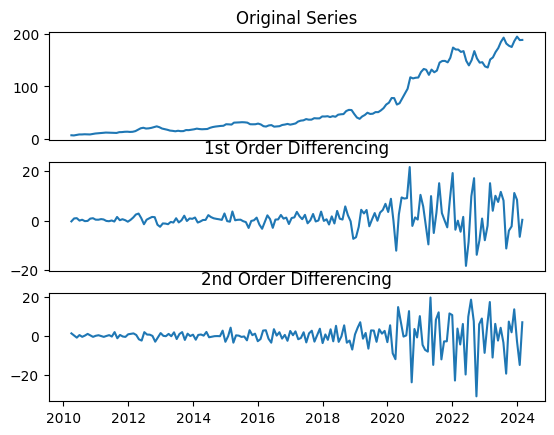

In [120]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(aapl_monthly_averages); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(aapl_monthly_averages.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(aapl_monthly_averages.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

# Here we can see how the time series has become stationary with differencing:

In [121]:
# Train/test split i.e. use last 24 values for testing
aapl_monthly_averages_train = aapl_monthly_averages.iloc[:-12]
aapl_monthly_averages_test = aapl_monthly_averages.iloc[-12:]

print(aapl_monthly_averages_train.shape, aapl_monthly_averages_test.shape)

(158,) (12,)


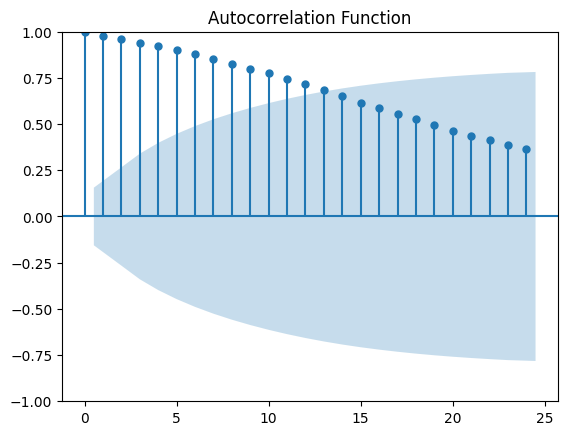

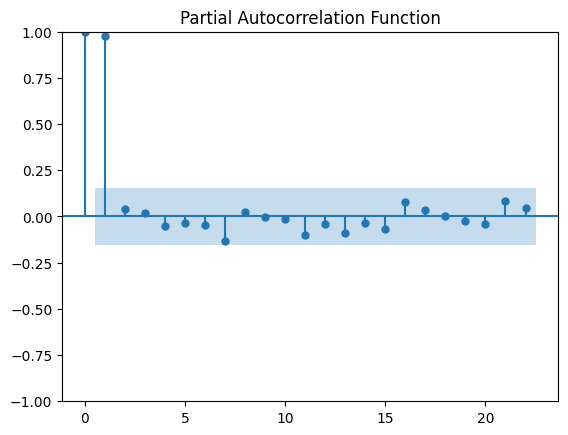

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the Autocorrelation Function (ACF) 
plot_acf(aapl_monthly_averages_train.dropna(), lags=24)
plt.title('Autocorrelation Function')
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(aapl_monthly_averages_train.dropna())
plt.title('Partial Autocorrelation Function')
plt.show()

- Nimmt die Autokorrelationen mit zunehmender Verzögerung allmählich ab, deutet dies in der Regel auf einen autoregressiven Prozess (AR) hin.
- Wenn die Autokorrelationen nach einer bestimmten Verzögerung stark abfallen, deutet dies in der Regel auf einen gleitenden Durchschnittsprozess (MA) hin.

ACF-Diagramm Interpretation:
Die ACF zeigt einen allmählichen Rückgang der Autokorrelation mit zunehmender Verzögerung, was häufig auf einen AR-Prozess hinweist.

PACF-Diagramm Interpretation:
Der PACF zeigt einen scharfen Cut-Off nach der ersten Verzögerung, was ein Merkmal eines AR(1)-Prozesses ist. Dies deutet darauf hin, dass die Time Series durch einen einzigen AR-Term gut repräsentiert werden könnten.

In [145]:
from statsmodels.tsa.arima.model import ARIMA

#Given ACF/PACF observations, a good starting point for the ARIMA model parameters based on these plots might be:

# p (AR term): 1, since the PACF plot cuts off sharply after the first lag.
# d (differencing): Typically represents the number of times the data had to be differenced to make it stationary, i.e. here 1
# q (MA term): 0, since the ACF plot tails off and there are no significant spikes after the initial lag.

# Build the ARIMA model
model = ARIMA(aapl_monthly_averages, order=(1,1,0))  # Should be chosen based on ACF and PACF analysis + differencing before
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  170
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -516.847
Date:                Thu, 15 Feb 2024   AIC                           1037.694
Time:                        16:19:17   BIC                           1043.954
Sample:                    01-31-2010   HQIC                          1040.235
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2112      0.047      4.473      0.000       0.119       0.304
sigma2        26.5332      1.680     15.791      0.000      23.240      29.827
Ljung-Box (L1) (Q):                   0.01   Jarque-

Aufteilung der Time Series in Training und Test Dataset:

In [150]:
# Let's test it with Auto ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Use pmdarima to automatically select best ARIMA model
auto_arima_model = auto_arima(y=aapl_monthly_averages_train,
                    m = 1,                # Season frequency, i.e. m is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data 
                    seasonal = False,     # TRUE if seasonal series
                    d = None,             # Let the model determine 'd'
                    test = 'adf',         # Use adftest to find optimal 'd'
                    start_p = 0, start_q = 0, # Minimum p and q
                    max_p = 12, max_q = 12, # Maximum p and q
                    D = None,             # Let model determine 'D'
                    trace = True,
                    information_criterion = 'aic',
                    error_action = 'ignore',  
                    suppress_warnings = True, 
                    stepwise = True)

# Print model summary
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=949.708, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=948.285, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=946.192, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=953.044, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=946.948, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=945.272, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=946.560, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=944.836, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=941.762, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=943.263, Time=0.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=943.282, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=943.304, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=935.251, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=945.225, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=935.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  158
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -460.620
Date:                Thu, 15 Feb 2024   AIC                            935.239
Time:                        16:29:18   BIC                            956.633
Sample:                    01-31-2010   HQIC                           943.928
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8233      1.005      1.814      0.070      -0.147       3.793
ar.L1         -0.1136      0.077     -1.470      0.142      -0.265       0.038
ar.L2         -0.9554      0.031    -30.343      0.000      -1.017      -0.894
ar.L3          0.1203      0.067      1.800      0.072      -0.011       0.251
ma.L1          0.3439      0.050      6.911      0.000       0.246       0.441
ma.L2          0.9699      0.040     24.005      0.000       0.891       1.049
sigma2        20.1289      1.761     11.428      0.000      16.677      23.581
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               150.81
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              42.72   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ganzer Output erklärt:
https://medium.com/@sachinnayak18/reading-arima-results-35eb1df7a565

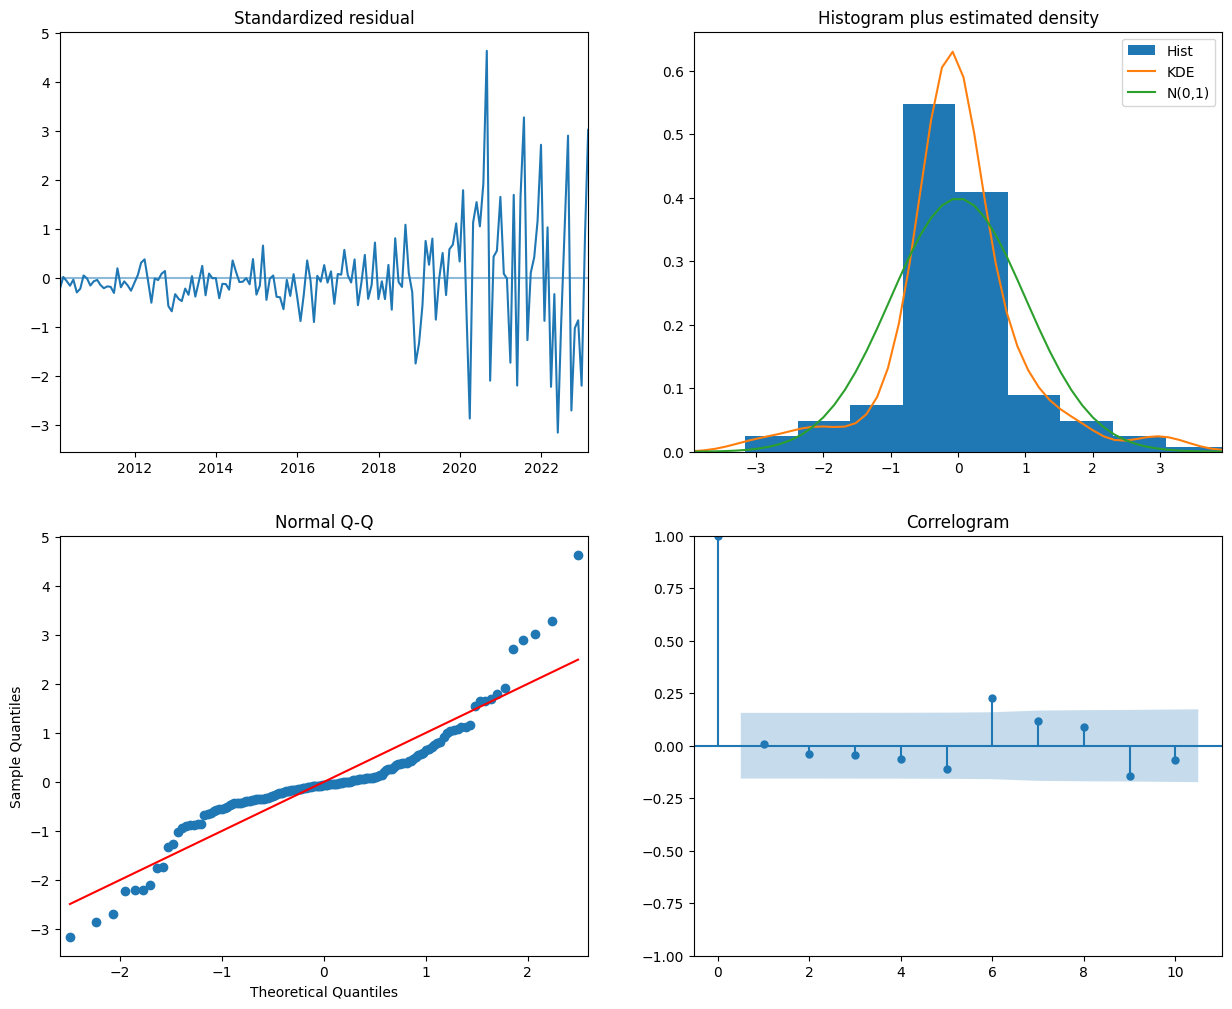

In [125]:
# Diagnostic plots for the ARIMA model
auto_arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Der QQ-Plot wird verwendet, um zu bestimmen, ob ein Datensatz einer bestimmten Verteilung folgt, in diesem Fall einer Normalverteilung:

- Theoretical Quantiles: Dies sind die erwarteten Werte aus der Normalverteilung, unter der Annahme, dass die Daten normalverteilt sind.
- Sample Quantiles: Dies sind die tatsächlichen Werte aus dem zu testenden Datensatz.

Die rote Linie im QQ-Plot repräsentiert die Linie, auf der die Daten liegen würden, wenn sie perfekt normalverteilt wären. Die blauen Punkte sind die tatsächlichen Datenquantile.

- Mittlerer Abschnitt: Im Zentrum des Diagramms (rund um die theoretischen Quantile zwischen -1 und 1) folgen die blauen Punkte der roten Linie ziemlich genau, was darauf hindeutet, dass der mittlere Teil der Distribution ähnlich einer Normalverteilung ist.
- Tails (Enden): Die unteren und oberen Enden (die Enden des Diagramms) weichen von der roten Linie ab. Das untere linke Ende des Diagramms zeigt, dass die blauen Punkte unterhalb der roten Linie fallen, was darauf hindeutet, dass das untere Ende des Datensatzes weniger extreme Werte aufweist, als für eine Normalverteilung erwartet. Das obere rechte Ende zeigt die blauen Punkte über der roten Linie, was auf das Vorhandensein von mehr extremen Werten im oberen Ende hinweist, als bei einer Normalverteilung erwartet würde.
- Gesamtform: Die 'S'-förmige Kurve des Diagramms deutet darauf hin, dass die Verteilung des Datensatzes "heavy Tails" bzw. eine Leptokurtosis im Vergleich zu einer Normalverteilung aufweist. Das bedeutet, dass mehr Ausreisser oder extreme Werte vorhanden sind, als bei einer Normalverteilung erwartet würden.

In [140]:
fc, confint = auto_arima_model.predict(n_periods=6, return_conf_int=True)
index_of_fc = pd.date_range(pd.to_datetime(aapl_monthly_averages.index[-1]), periods = 6, freq = 'MS')

In [126]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model with the train dataset
arima_model = ARIMA(aapl_monthly_averages_train, order=(3,1,2)) # Define model based on Auto ARIMA values
arima_model = arima_model.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  158
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -467.272
Date:                Thu, 15 Feb 2024   AIC                            946.544
Time:                        16:08:15   BIC                            964.881
Sample:                    01-31-2010   HQIC                           953.991
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1465      0.146     -7.853      0.000      -1.433      -0.860
ar.L2         -0.4957      0.117     -4.222      0.000      -0.726      -0.266
ar.L3         -0.1125      0.067     -1.690      0.091      -0.243       0.018
ma.L1          1.3970      0.125     11.173      0.000       1.152       1.642
ma.L2          0.6336      0.116      5.450      0.000       0.406       0.861
sigma2        22.4740      1.628     13.802      0.000      19.283      25.665
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               111.41
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):              56.37   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
start = len(aapl_monthly_averages_train)
end = len(aapl_monthly_averages_train) + len(aapl_monthly_averages_test)
predictions = arima_model.predict(start=start, end=end)

<Axes: xlabel='Date'>

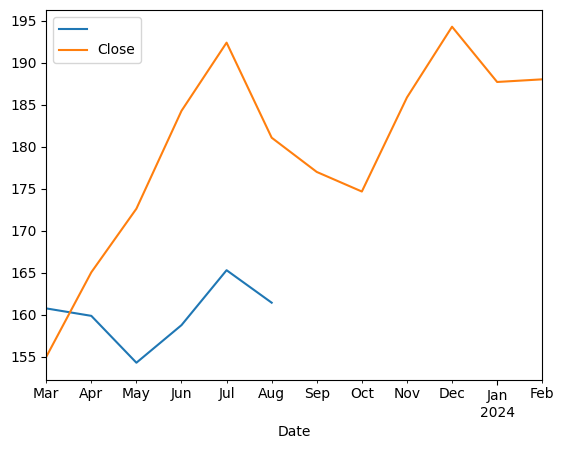

In [143]:
predictions.plot(legend=True)
aapl_monthly_averages_test.plot(legend=True)

In [110]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.offsets import BDay

# Forecast future values
forecast_steps = 12
forecast = auto_arima_model.get_forecast(steps=forecast_steps)

# Obtain the forecast index starting after the last date of the observed data
forecast_index = pd.date_range(start=aapl_monthly_averages.index[-1] + BDay(1), periods=forecast_steps, freq='B')

# Plot actual vs. forecasted values
plt.figure(figsize=(10,5))
plt.plot(aapl_monthly_averages.index[-10:], aapl_monthly_averages[-10:], label='Actual Values')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Values', color='red')

# Set the x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Dynamically adjust the x-axis limits to include the forecasted dates
plt.xlim(aapl_monthly_averages.index[-10], forecast_index[-1] + BDay(1))

plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


AttributeError: 'ARIMA' object has no attribute 'get_forecast'